<a href="https://colab.research.google.com/github/manavkapur/100DayTensorFlow/blob/main/00_NeuralNetwork_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

Okay, enough talk, let's get started writing code.

To use TensorFlow, we'll import it as the common alias `tf` (short for TensorFlow).

In [1]:
import tensorflow as tf

## Creating data to view and fit

Since we're working on a **regression problem** (predicting a number) let's create some linear data (a straight line) to model.

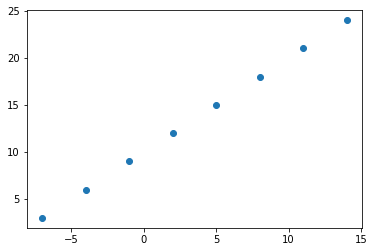

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#creature features 

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y)

Before we do any modelling, can you calculate the pattern between `X` and `y`?

For example, say I asked you, based on this data what the `y` value would be if `X` was 17.0?

Or how about if `X` was -10.0?

This kind of pattern discovery is the essence of what we'll be building neural networks to do for us.

## Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [3]:
#Example input and output shapes of regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
house_info.shape

TensorShape([3])

In [5]:
#Take a single example of X
input_shape = X[0].shape

#Take a single example of y
output_shape = y[0].shape

input_shape, output_shape #these are both scalar (np shape)

((), ())

In [6]:
#Turn numpy array into tenors
X = tf.cast(tf.constant(X),dtype = tf.float32)
y = tf.cast(tf.constant(y),dtype = tf.float32)
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape =  X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

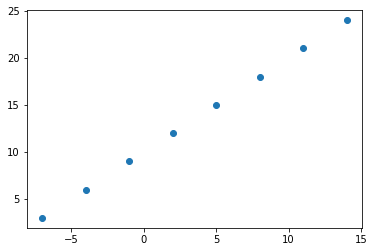

In [8]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`. 

In [9]:
# Set random seed

# Create a model using the sequential api

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

#Compile the model
model.compile(loss = tf.keras.losses.mae, #mar is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient
              metrics = ["mae"])

#fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs = 5)


Epoch 1/5
1/1 [==============================] - 1s 526ms/step - loss: 11.3495 - mae: 11.3495
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2170 - mae: 11.2170
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.0845 - mae: 11.0845
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9520 - mae: 10.9520
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.8195 - mae: 10.8195


In [10]:
X, y 

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 78ms/step


array([[13.470488]], dtype=float32)

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [12]:
#rebuild

#create

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

#Compile

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]) 

#fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)


Epoch 1/100
1/1 [==============================] - 0s 299ms/step - loss: 7.9275 - mae: 7.9275
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 7.7950 - mae: 7.7950
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 7.6625 - mae: 7.6625
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5300 - mae: 7.5300
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4700 - mae: 7.4700
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 7.4644 - mae: 7.4644
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4587 - mae: 7.4587
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4531 - mae: 7.4531
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.4475 - mae: 7.4475
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4419 - mae: 7.4419
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss:

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 192ms/step


array([[30.206242]], dtype=float32)

In [14]:
#create

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

#fit
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)


Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 355ms/step - loss: 11.3277 - mae: 11.3277
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3272 - mae: 11.3272
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3268 - mae: 11.3268
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3263 - mae: 11.3263
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3259 - mae: 11.3259
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3254 - mae: 11.3254
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3250 - mae: 11.3250
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 11.3245 - mae: 11.3245
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3241 - mae: 11.3241
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3236 - mae: 11.3236
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - los

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 194ms/step


array([[10.731239]], dtype=float32)

In [16]:
#create

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(1)
])

#Compile

model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)


Epoch 1/100
1/1 [==============================] - 0s 369ms/step - loss: 12.8900 - mae: 12.8900
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3060 - mae: 12.3060
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 11.7271 - mae: 11.7271
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1514 - mae: 11.1514
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5569 - mae: 10.5569
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9412 - mae: 9.9412
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.3535 - mae: 9.3535
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7315 - mae: 8.7315
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.0773 - mae: 8.0773
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3880 - mae: 7.3880
Epoch 11/100
1/1 [==============================] - 0s 6ms/step

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 55ms/step


array([[31.607237]], dtype=float32)